rdkit uses a special case of Tversky similarity for count-based Tanimoto similarity under the hood:
https://www.rdkit.org/docs/cppapi/SparseIntVect_8h_source.html#l00571

I wasn't sure if this implementation is the same as the Ruzicka similarity I already calculated like this:
```python
def ruzicka_similarity(A, B):
    min_sum = np.sum(np.minimum(A, B))
    max_sum = np.sum(np.maximum(A, B))
    
    return min_sum / max_sum
```

But this notebook shows that it is.

<class 'rdkit.DataStructs.cDataStructs.UIntSparseIntVect'>


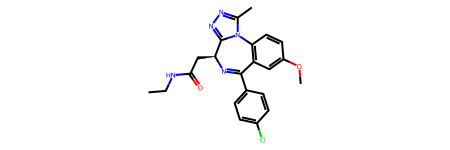

In [1]:
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator, SmilesMolSupplier

supplier = SmilesMolSupplier('data/datasets/compounds_ms2structures.csv', delimiter=',', titleLine=True, smilesColumn=1, nameColumn=0)
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=9)

ref_mol = next(supplier)
ref_fp = fpgen.GetCountFingerprint(ref_mol)
print(type(ref_fp))
ref_mol

In [2]:
from itertools import islice

other_fps = [fpgen.GetCountFingerprint(mol) for mol in supplier]
tanimoto_similarities = DataStructs.BulkTanimotoSimilarity(ref_fp, other_fps)
tanimoto_similarities

[1.0,
 0.14537444933920704,
 0.060240963855421686,
 0.1291866028708134,
 0.13145539906103287,
 0.08205128205128205,
 0.12448132780082988,
 0.05625,
 0.0658682634730539,
 0.03233830845771144,
 0.11895910780669144,
 0.1330049261083744,
 0.05010438413361169,
 0.1380952380952381,
 0.075,
 0.10849056603773585,
 0.05913978494623656,
 0.18518518518518517,
 0.1267605633802817,
 0.10996563573883161,
 0.037914691943127965,
 0.0755287009063444,
 0.12184873949579832,
 0.11764705882352941,
 0.15602836879432624,
 0.06746031746031746,
 0.07407407407407407,
 0.11013215859030837,
 0.05925925925925926,
 0.09871244635193133,
 0.08041958041958042,
 0.12048192771084337,
 0.04185351270553064,
 0.10810810810810811,
 0.056962025316455694,
 0.0735930735930736,
 0.13114754098360656,
 0.08641975308641975,
 0.11353711790393013,
 0.15207373271889402,
 0.08636363636363636,
 0.10588235294117647,
 0.1056701030927835,
 0.1935483870967742,
 0.033816425120772944,
 0.14705882352941177,
 0.08982035928143713,
 0.0982142857

In [3]:
import os
import numpy as np

sim_matrix_file = os.path.join("data", "group_similarity", f"compounds_ms2structures_ruzicka_similarities_morgan9_2048bits.npy")
sim_matrix = np.load(sim_matrix_file, mmap_mode ='r')
sim_matrix.shape

(37811, 37811)

In [4]:
ruzicka_similarities = sim_matrix[0]
ruzicka_similarities

memmap([1.        , 0.14537445, 0.06024097, ..., 0.14432989, 0.09448819,
        0.08896797], dtype=float32)

In [7]:
discrepancy_found = False
for i, tanimoto in enumerate(tanimoto_similarities):
    if not np.isclose(tanimoto, ruzicka_similarities[i]):
        print(f"Discrepancy at index {i}: {tanimoto - ruzicka_similarities[i]}\n Tanimoto = {tanimoto}, Ruzicka = {ruzicka_similarities[i]}")

if not discrepancy_found:
    print("No discrepancies found between rdkits count-based Tanimoto and Ruzicka similarities.")

No discrepancies found between rdkits count-based Tanimoto and Ruzicka similarities.
